In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *

In [3]:
from planet import f2

metrics=[f2]
f_model = resnet34

In [4]:
PATH = '/home/ubuntu/fastai/courses/dl1/data/galaxy/'
%cd '/home/ubuntu/fastai/courses/dl1/data/galaxy/'

/home/ubuntu/data/galaxy


In [5]:
f_model = resnet34

In [6]:
df = pd.read_csv('training_solutions_rev1.csv')
df = df.set_index('GalaxyID')
s = np.where(df > .5, ['{} '.format(x) for x in df.columns], '')   
df1 = pd.DataFrame({'classes': [''.join(x) for x in s],'GalaxyID': df.index})
df1.to_csv('labels_1.csv', index = False)

In [7]:
label_csv = f'{PATH}labels_1.csv'

In [8]:
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [9]:
val_idxs

array([ 7523, 38598, 60084, ..., 44732, 54343, 38158])

In [10]:
len(val_idxs)

12315

In [11]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'images_training_rev1', label_csv, tfms=tfms,
                    suffix='.jpg', val_idxs=val_idxs, test_name='images_test_rev1')

In [12]:
data = get_data(16)

In [13]:
x,y = next(iter(data.val_dl))

In [16]:
list(zip(data.classes, y[0]))

[('Class1.1', 1.0),
 ('Class1.2', 0.0),
 ('Class1.3', 0.0),
 ('Class10.1', 0.0),
 ('Class10.2', 0.0),
 ('Class10.3', 0.0),
 ('Class11.1', 0.0),
 ('Class11.2', 0.0),
 ('Class11.3', 0.0),
 ('Class11.4', 0.0),
 ('Class11.5', 0.0),
 ('Class11.6', 0.0),
 ('Class2.1', 0.0),
 ('Class2.2', 0.0),
 ('Class3.1', 0.0),
 ('Class3.2', 0.0),
 ('Class4.1', 0.0),
 ('Class4.2', 0.0),
 ('Class5.1', 0.0),
 ('Class5.2', 0.0),
 ('Class5.3', 0.0),
 ('Class5.4', 0.0),
 ('Class6.1', 0.0),
 ('Class6.2', 1.0),
 ('Class7.1', 0.0),
 ('Class7.2', 1.0),
 ('Class7.3', 0.0),
 ('Class8.1', 0.0),
 ('Class8.2', 0.0),
 ('Class8.3', 0.0),
 ('Class8.4', 0.0),
 ('Class8.5', 0.0),
 ('Class8.6', 0.0),
 ('Class8.7', 0.0),
 ('Class9.1', 0.0),
 ('Class9.2', 0.0),
 ('Class9.3', 0.0)]

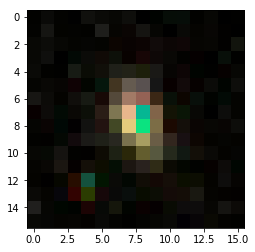

In [17]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [18]:
sz = 16
data = data.resize(int(sz*1.3), 'tmp')
learn = ConvLearner.pretrained(f_model, data, metrics = metrics)

A Jupyter Widget

A Jupyter Widget

[ 0.       0.1914   0.18412  0.68584]                        



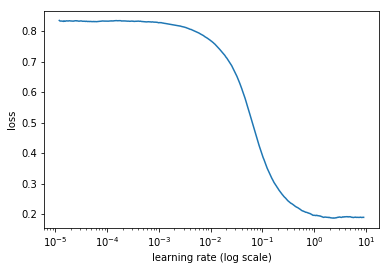

In [19]:
lrf=learn.lr_find()
learn.sched.plot()

In [20]:
lr = 0.2

In [21]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=1)

A Jupyter Widget

[ 0.       0.16684  0.16417  0.70756]                        
[ 1.       0.16069  0.16112  0.71233]                        
[ 2.       0.15929  0.16193  0.7095 ]                        



In [22]:
lrs = np.array([lr/9,lr/3,lr])

In [23]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.15349  0.15978  0.71243]                        
[ 1.       0.15148  0.15601  0.72347]                        
[ 2.       0.14672  0.16164  0.707  ]                        
[ 3.       0.14713  0.1624   0.7063 ]                        
[ 4.       0.1464   0.17556  0.67246]                        
[ 5.       0.14182  0.16264  0.70508]                        
[ 6.       0.14304  0.16068  0.71122]                        



In [24]:
learn.save(f'{sz}')

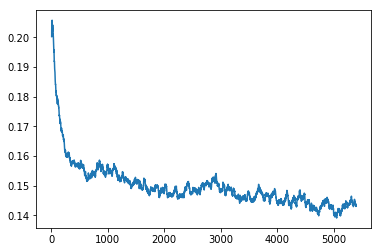

In [25]:
learn.sched.plot_loss()

In [26]:
sz = 32

In [27]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.16961  0.20458  0.61291]                        
[ 1.       0.17023  0.20971  0.6136 ]                        
[ 2.       0.16601  0.21369  0.60775]                        
[ 3.       0.16667  0.21249  0.60861]                        
[ 4.       0.16592  0.20975  0.61541]                        
[ 5.       0.16591  0.21833  0.59964]                        
[ 6.       0.16412  0.21995  0.59908]                        



In [28]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.1338   0.15406  0.72256]                        
[ 1.       0.12953  0.15233  0.72876]                        
[ 2.       0.12464  0.15114  0.72979]                        
[ 3.       0.12787  0.14597  0.7387 ]                        
[ 4.       0.12371  0.15099  0.7294 ]                        
[ 5.       0.11767  0.14897  0.73362]                        
[ 6.       0.11746  0.14777  0.73712]                        



In [29]:
sz = 64

In [30]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.14444  0.15846  0.71498]                        
[ 1.       0.14243  0.15723  0.72074]                        
[ 2.       0.13829  0.15699  0.7226 ]                        
[ 3.       0.13934  0.15515  0.72743]                        
[ 4.       0.13709  0.15271  0.73225]                        
[ 5.       0.13534  0.1561   0.72505]                        
[ 6.       0.13548  0.15337  0.7315 ]                        



In [31]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.11482  0.11908  0.79833]                        
[ 1.       0.11001  0.12419  0.77633]                        
[ 2.       0.10677  0.12409  0.77278]                        
[ 3.       0.10808  0.14384  0.72797]                        
[ 4.       0.10267  0.13616  0.7429 ]                        
[ 5.       0.10134  0.14737  0.71952]                         
[ 6.       0.09955  0.15355  0.70445]                         



In [32]:
sz = 128

In [33]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

A Jupyter Widget

[ 0.       0.12101  0.27156  0.56166]                        
[ 1.       0.11557  0.23244  0.59129]                        
[ 2.       0.11538  0.23658  0.58632]                        
[ 3.       0.11543  0.23454  0.58877]                        
[ 4.       0.11259  0.22171  0.60451]                        
[ 5.       0.11165  0.21391  0.61111]                        
[ 6.       0.11235  0.21936  0.60609]                        



In [34]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

A Jupyter Widget

[ 0.       0.09995  0.11964  0.78334]                         
[ 1.       0.09689  0.12285  0.76779]                         
[ 2.       0.09094  0.12349  0.76474]                         
[ 3.       0.09713  0.12122  0.77161]                         
[ 4.       0.09117  0.12021  0.76937]                         
[ 5.       0.08837  0.1254   0.759  ]                         
[ 6.       0.08699  0.12635  0.75791]                         



In [35]:
tta = learn.TTA()

In [36]:
f2(*tta)

0.85636038687506066